In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint, ode, solve_ivp

# plt.style.use("ggplot")
# plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 15
# plt.rcParams.update({'figure.autolayout': True})
plt.rc('text', usetex=True)

# import smplotlib

pd.set_option("display.max_columns", 50)


def odes(t, arej):
    x, y, u, v = arej
    xpika = u
    ypika = v
    upika = -x * np.power(x**2 + y**2, -3 / 2)
    vpika = -y * np.power(x**2 + y**2, -3 / 2)

    return [xpika, ypika, upika, vpika]
def calculate_H(sol):
    def _H(arej):
        x,y,u,v = arej
        return 0.5*(u**2+v**2) - 1/(x**2 + y**2)**(0.5)
    return np.apply_along_axis(_H, 1, sol)
def calculate_L(sol):
    def _absL(arej):
        x,y,u,v = arej
        return np.linalg.norm(np.cross([x,y,0],[u,v,0]))
    return np.apply_along_axis(_absL, 1, sol)
def calculate_A(sol):
    def _absA(arej):
        x,y,u,v = arej
        return np.linalg.norm(np.cross([x,y,0], [u,v,0]) - np.array([x,y,0])/np.linalg.norm([x,y,0]))
    return np.apply_along_axis(_absA,1,sol)

v0s = [1, np.sqrt(2), 1.5, 0.7]
rezs = []
for v0 in v0s:
    initial = [1, 0, 0, v0]
    dt = 0.01
    t_span = np.arange(0, 10, dt)

    sol = solve_ivp(odes, t_span=[t_span.min(), t_span.max()],
                    t_eval = t_span, tfirst=True,
                    y0=initial, dense_output=True,
                    rtol=1e-20, atol=1e-20)
    sol.H = calculate_H(sol.y.T)
    sol.L = calculate_L(sol.y.T)
    sol.A = calculate_A(sol.y.T)
    rezs.append(sol)

/home/peter/miniforge3/envs/modelska/lib/python3.12/site-packages/scipy/integrate/_ivp/ivp.py:621: UserWarning: The following arguments have no effect for a chosen solver: `tfirst`.
  solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)
/home/peter/miniforge3/envs/modelska/lib/python3.12/site-packages/scipy/integrate/_ivp/ivp.py:621: UserWarning: At least one element of `rtol` is too small. Setting `rtol = np.maximum(rtol, 2.220446049250313e-14)`.
  solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)


<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_319588/2195600122.py:4: SyntaxWarning: invalid escape sequence '\s'
  v0 = "\sqrt{2}"


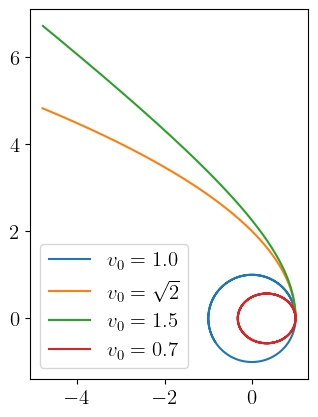

In [2]:
for sol in rezs:
    v0 = sol.y[3, 0]
    if v0 == np.sqrt(2):
        v0 = "\sqrt{2}"
    else:
        v0 = f"{v0:0.1f}"
    plt.plot(sol.y[0, :], sol.y[1,:], label=fr"$v_0={v0}$", )
plt.legend()
plt.gca().set_aspect("equal")
plt.savefig("images/1-1-v0.pdf")

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:42: SyntaxWarning: invalid escape sequence '\s'
<>:61: SyntaxWarning: invalid escape sequence '\s'
<>:80: SyntaxWarning: invalid escape sequence '\s'
<>:99: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:42: SyntaxWarning: invalid escape sequence '\s'
<>:61: SyntaxWarning: invalid escape sequence '\s'
<>:80: SyntaxWarning: invalid escape sequence '\s'
<>:99: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_319588/3419746988.py:4: SyntaxWarning: invalid escape sequence '\s'
  v0 = "\sqrt{2}"
/tmp/ipykernel_319588/3419746988.py:23: SyntaxWarning: invalid escape sequence '\s'
  v0 = "\sqrt{2}"
/tmp/ipykernel_319588/3419746988.py:42: SyntaxWarning: invalid escape sequence '\s'
  v0 = "\sqrt{2}"
/tmp/ipykernel_319588/3419746988.py:61: SyntaxWarning: invalid escape sequence '\s'
 

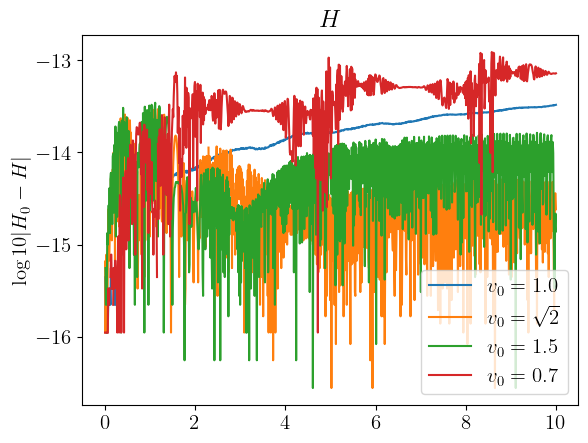

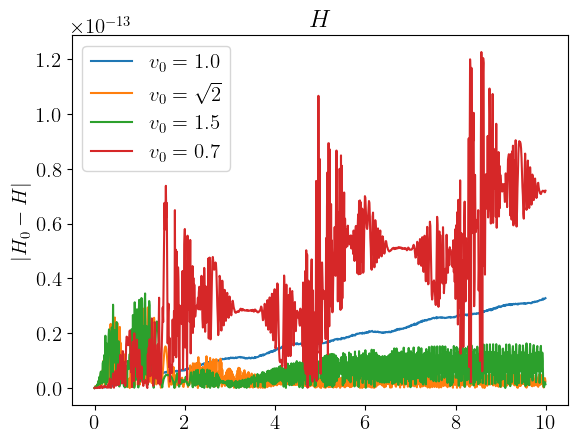

/tmp/ipykernel_319588/3419746988.py:47: RuntimeWarning: divide by zero encountered in log10
  np.log10(np.abs(Q[0]-Q)),


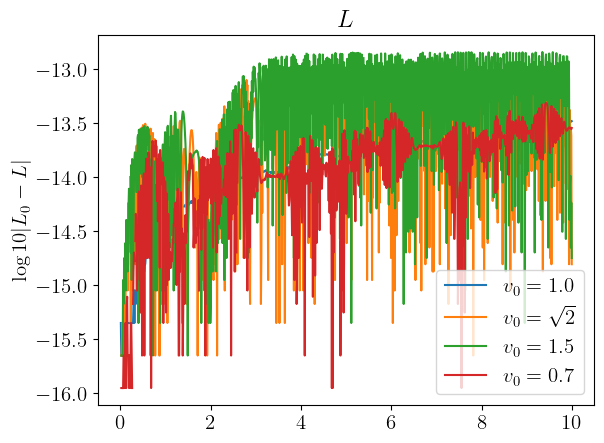

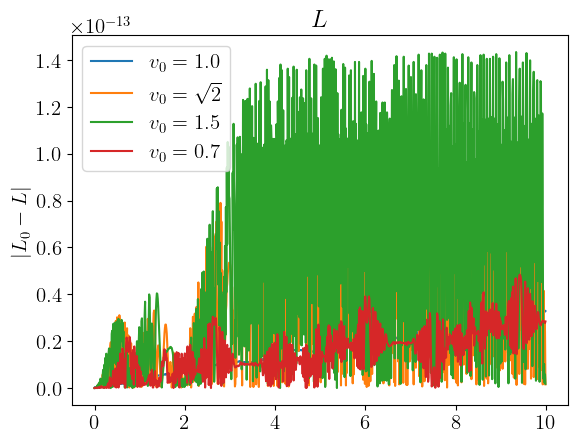

/tmp/ipykernel_319588/3419746988.py:85: RuntimeWarning: divide by zero encountered in log10
  np.log10(np.abs(Q[0]-Q)),


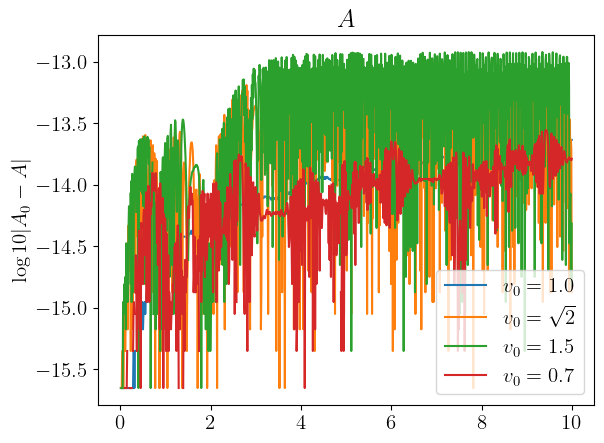

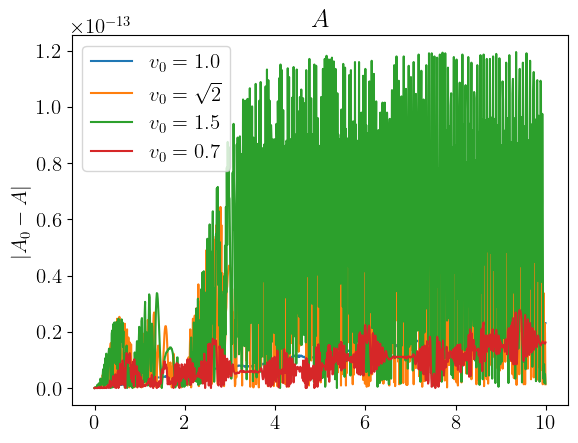

<Figure size 640x480 with 0 Axes>

In [3]:
for sol in rezs:
    v0 = sol.y[3, 0]
    if v0 == np.sqrt(2):
        v0 = "\sqrt{2}"
    else:
        v0 = f"{v0:0.1f}"
    Q ,  strQ= sol.H, "H"
    plt.plot(sol.t, #np.log10(np.abs((Q[0] - Q) )),
             np.log10(np.abs(Q[0]-Q)),

             label=fr"$v_0={v0}$")
plt.ylabel(fr"$ \log10 |{strQ}_0 - {strQ}|$")
plt.legend()
plt.title(f"${strQ}$")
plt.savefig(f"images/1-1-{strQ}_log.pdf")
plt.show()
plt.clf()
plt.clf()

for sol in rezs:
    v0 = sol.y[3, 0]
    if v0 == np.sqrt(2):
        v0 = "\sqrt{2}"
    else:
        v0 = f"{v0:0.1f}"
    Q ,  strQ= sol.H, "H"
    plt.plot(sol.t, #np.log10(np.abs((Q[0] - Q) )),
             np.abs(Q[0]-Q),

             label=fr"$v_0={v0}$")
plt.ylabel(fr"$|{strQ}_0 - {strQ}|$")
# plt.ylim((None, 100))
plt.legend()
plt.title(f"${strQ}$")
plt.savefig(f"images/1-1-{strQ}_lin.pdf")
plt.show()
plt.clf()

for sol in rezs:
    v0 = sol.y[3, 0]
    if v0 == np.sqrt(2):
        v0 = "\sqrt{2}"
    else:
        v0 = f"{v0:0.1f}"
    Q ,  strQ= sol.L, "L"
    plt.plot(sol.t, #np.log10(np.abs((Q[0] - Q) )),
             np.log10(np.abs(Q[0]-Q)),

             label=fr"$v_0={v0}$")
plt.ylabel(fr"$ \log10 |{strQ}_0 - {strQ}|$")
plt.legend()
plt.title(f"${strQ}$")
plt.savefig(f"images/1-1-{strQ}_log.pdf")
plt.show()
plt.clf()
plt.clf()

for sol in rezs:
    v0 = sol.y[3, 0]
    if v0 == np.sqrt(2):
        v0 = "\sqrt{2}"
    else:
        v0 = f"{v0:0.1f}"
    Q ,  strQ= sol.L, "L"
    plt.plot(sol.t, #np.log10(np.abs((Q[0] - Q) )),
             np.abs(Q[0]-Q),

             label=fr"$v_0={v0}$")
plt.ylabel(fr"$|{strQ}_0 - {strQ}|$")
plt.legend()
plt.title(f"${strQ}$")
plt.savefig(f"images/1-1-{strQ}_lin.pdf")
plt.show()
plt.clf()


for sol in rezs:
    v0 = sol.y[3, 0]
    if v0 == np.sqrt(2):
        v0 = "\sqrt{2}"
    else:
        v0 = f"{v0:0.1f}"
    Q ,  strQ= sol.A, "A"
    plt.plot(sol.t, #np.log10(np.abs((Q[0] - Q) )),
             np.log10(np.abs(Q[0]-Q)),

             label=fr"$v_0={v0}$")
plt.ylabel(fr"$ \log10 |{strQ}_0 - {strQ}|$")
plt.legend()
plt.title(f"${strQ}$")
plt.savefig(f"images/1-1-{strQ}_log.pdf")
plt.show()
plt.clf()
plt.clf()

for sol in rezs:
    v0 = sol.y[3, 0]
    if v0 == np.sqrt(2):
        v0 = "\sqrt{2}"
    else:
        v0 = f"{v0:0.1f}"
    Q ,  strQ= sol.A, "A"
    plt.plot(sol.t, #np.log10(np.abs((Q[0] - Q) )),
             np.abs(Q[0]-Q),

             label=fr"$v_0={v0}$")
plt.ylabel(fr"$|{strQ}_0 - {strQ}|$")
plt.legend()
plt.title(f"${strQ}$")
plt.savefig(f"images/1-1-{strQ}_lin.pdf")
plt.show()
plt.clf()

In [4]:
v0 = 1
initial = [1, 0, 0, v0]
dt = 1.0
t_span = np.arange(0, 15, dt)

def camearound(t, y):
    return y[1]
camearound.terminal = False
camearound.direction = 1

sol = solve_ivp(odes, t_span=[0, 60],
                y0=initial, dense_output=True,
                events = camearound,
                rtol=1e-20, atol=1e-20)

sol.t_events[0] / np.pi

/home/peter/miniforge3/envs/modelska/lib/python3.12/site-packages/scipy/integrate/_ivp/ivp.py:621: UserWarning: At least one element of `rtol` is too small. Setting `rtol = np.maximum(rtol, 2.220446049250313e-14)`.
  solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)


array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.])

In [5]:
sols = []
v0s = np.linspace(0.05, np.sqrt(2), 20)
for v0 in v0s:
    initial = [1, 0, 0, v0]
    if v0 == np.sqrt(2):
        v0str = "\sqrt{2}"
    else:
        v0str = f"{v0:0.1f}"
    def camearound(t, y):
        return y[1]
    camearound.terminal = False
    camearound.direction = 1

    sol = solve_ivp(odes, t_span=[0, 50*np.pi],
                    y0=initial, dense_output=True,
                    events = camearound,
                    rtol=1e-20, atol=1e-20)
    sol.v0 = v0
    sol.v0str = v0str
    sols.append(sol)


<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_319588/478484908.py:6: SyntaxWarning: invalid escape sequence '\s'
  v0str = "\sqrt{2}"


/home/peter/miniforge3/envs/modelska/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/peter/miniforge3/envs/modelska/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/peter/miniforge3/envs/modelska/lib/python3.12/site-packages/numpy/_core/_methods.py:227: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/peter/miniforge3/envs/modelska/lib/python3.12/site-packages/numpy/_core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/peter/miniforge3/envs/modelska/lib/python3.12/site-packages/numpy/_core/_methods.py:219: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


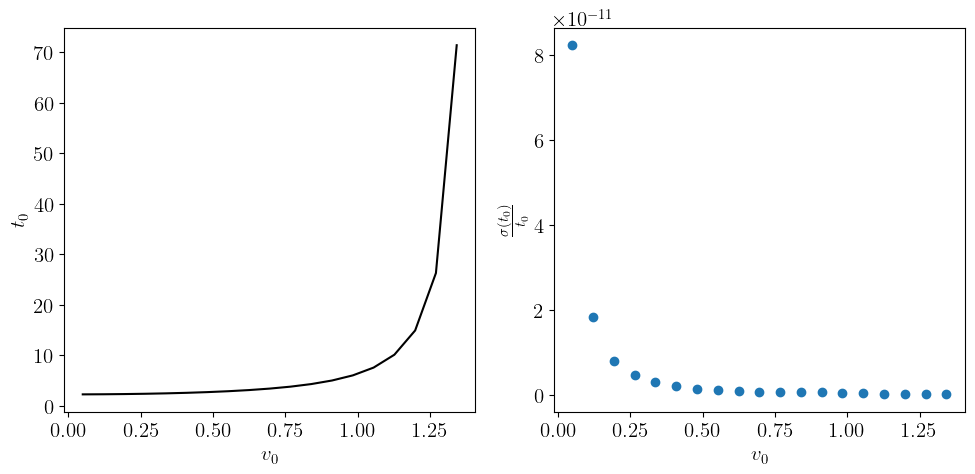

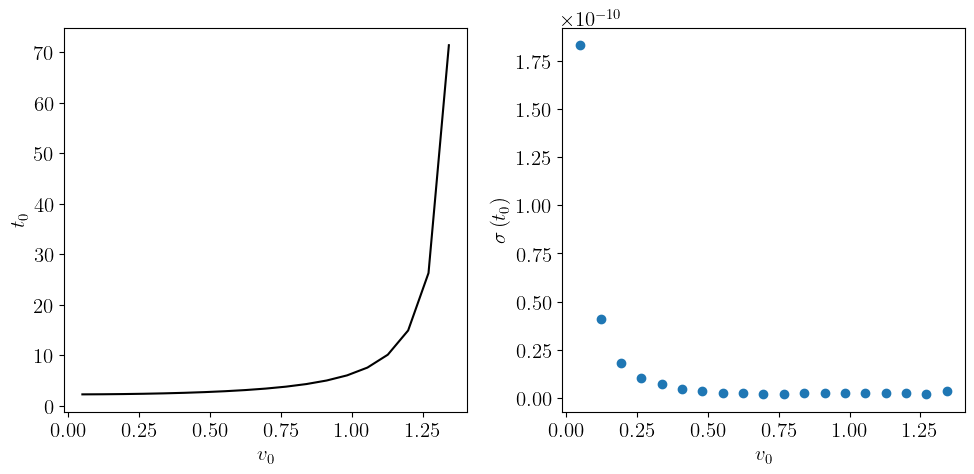

,v0,v0str,tavg,tstd,rel_tstd
0,0.050000,0.1,2.225613,1.829326e-10,8.219425e-11
1,0.121801,0.1,2.246390,4.119807e-11,1.833968e-11
2,0.193601,0.2,2.285384,1.818383e-11,7.956575e-12
3,0.265402,0.3,2.344185,1.056292e-11,4.506009e-12
4,0.337203,0.3,2.425301,7.146171e-12,2.946509e-12
5,0.409004,0.4,2.532428,4.996276e-12,1.972919e-12
6,0.480804,0.5,2.670864,3.679900e-12,1.377794e-12
7,0.552605,0.6,2.848186,2.875132e-12,1.009461e-12
8,0.624406,0.6,3.075343,2.500001e-12,8.129180e-13
9,0.696206,0.7,3.368475,2.370909e-12,7.038521e-13


In [6]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame(data={
    "v0": [sol.v0 for sol in sols],
    "v0str": [sol.v0str for sol in sols],
    "tavg" : [np.mean(np.diff(sol.t_events, 1)) for sol in sols],
    "tstd" : [np.std(np.diff(sol.t_events, 1)) for sol in sols],
})
df["rel_tstd"] = df.tstd/df.tavg
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].errorbar(df.v0, df.tavg, yerr=df.tstd, color="k")
axes[0].set_ylabel("$t_0$")
axes[0].set_xlabel("$v_0$")
axes[1].scatter(df.v0, df.rel_tstd,)
axes[1].set_xlabel("$v_0$")
axes[1].set_ylabel(r"$\frac{\sigma(t_0)}{t_0}$")
fig.tight_layout()
fig.savefig("images/1-2-t0_rel.pdf")
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].errorbar(df.v0, df.tavg, yerr=df.tstd, color="k")
axes[0].set_ylabel("$t_0$")
axes[0].set_xlabel("$v_0$")
axes[1].scatter(df.v0, df.tstd,)
axes[1].set_xlabel("$v_0$")
axes[1].set_ylabel(r"$\sigma \left( t_0 \right)$")
fig.tight_layout()
fig.savefig("images/1-2-t0_abs.pdf")
plt.show()
df

In [7]:
def integrate(t_max:"Time until the end of integration" = 10,
             dt:"Time step" = 0.1,
             initial:"Array of initial conditions [x, y, xdot, ydot]"=[1,0,0,1],
             ):
    def odes(t, arej):
        x,y,u,v = arej
        xpika = u
        ypika = v
        upika = - x * np.power(x**2 + y**2, -3/2)
        vpika = - y * np.power(x**2 + y**2, -3/2)

        return [xpika, ypika, upika, vpika]
    t = np.arange(0,t_max,dt)
    r = ode(odes).set_integrator('dopri5')
    r.set_initial_value(initial, t[0])
    sol = np.zeros((t.shape[0], 4)) #Result buffer
    for i, t_i in enumerate(t):
        sol[i,:] = r.integrate(t_i)
    return t, sol
def plot_trajectory(sol:"ndarray with columns x, y, xdot, ydot"):
    initial_conditions = sol[0, :]
    fig, ax = plt.subplots()
    ax.plot(sol[:,0], sol[:,1])
    ax.set_aspect('equal')
    plt.show()
def calculate_H(sol):
    def _H(arej):
        x,y,u,v = arej
        return 0.5*(u**2+v**2) - 1/(x**2 + y**2)**0.5
    return np.apply_along_axis(_H, 1, sol)
def calculate_L(sol):
    def _absL(arej):
        x,y,u,v = arej
        return np.linalg.norm(np.cross([x,y,0],[u,v,0]))
    return np.apply_along_axis(_absL, 1, sol)
def calculate_A(sol):
    def _absA(arej):
        x,y,u,v = arej
        return np.linalg.norm(np.cross([x,y,0], [u,v,0]) - np.array([x,y,0])/np.linalg.norm([x,y,0]))
    return np.apply_along_axis(_absA,1,sol)

/home/peter/miniforge3/envs/modelska/lib/python3.12/site-packages/scipy/integrate/_ode.py:438: UserWarning: dopri5: step size becomes too small
  self._y, self.t = mth(self.f, self.jac or (lambda: None),


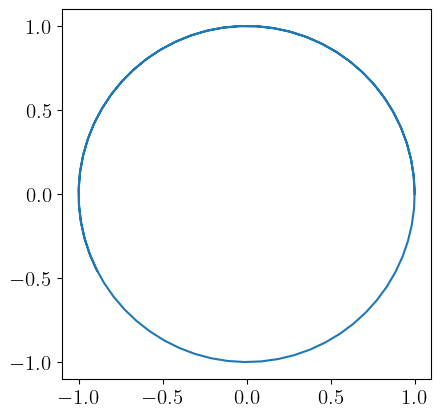

In [8]:
t, sol = integrate()
fig, ax = plt.subplots()
ax.plot(sol[:, 0], sol[:, 1])
ax.set_aspect('equal')
plt.savefig("0-simple-trajectory.pdf")
plt.show()

<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_319588/1025281629.py:15: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$|\mathcal{H} - \mathcal{H}_0 |$ (a.e.)")


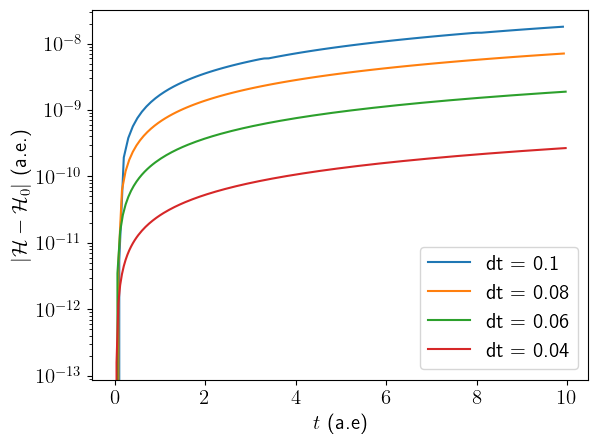

In [9]:
dt = 0.1
t, sol = integrate(dt=dt)
plt.plot(t, np.abs(calculate_H(sol) - calculate_H(sol)[0]), label=f"dt = {dt}")
dt = 0.08
t, sol = integrate(dt=dt)
plt.plot(t, np.abs(calculate_H(sol) - calculate_H(sol)[0]), label=f"dt = {dt}")
dt = 0.06
t, sol = integrate(dt=dt)
plt.plot(t, np.abs(calculate_H(sol) - calculate_H(sol)[0]), label=f"dt = {dt}")
dt = 0.04
t, sol = integrate(dt=dt)
plt.plot(t, np.abs(calculate_H(sol) - calculate_H(sol)[0]), label=f"dt = {dt}")
plt.legend()
# plt.title("""$\mathcal{H}$ pri različnih časovnih korakih""", pad=20)
plt.ylabel("$|\mathcal{H} - \mathcal{H}_0 |$ (a.e.)")
plt.xlabel("$t$ (a.e)")
plt.semilogy()
plt.savefig("images/1-H.pdf")

In [10]:
dts = np.logspace(-4, 0, 50)
Hs = np.empty_like(dts)
Ls = np.empty_like(dts)
As = np.empty_like(dts)
for i, dt in enumerate(dts):
    print(f"i={i}", end="\r")
    sol = integrate(dt=dt)[1]
    Hs[i] = np.std(calculate_H(sol))
    Ls[i] = np.std(calculate_L(sol))
    As[i] = np.std(calculate_A(sol))

<>:9: SyntaxWarning: invalid escape sequence '\D'
<>:9: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_319588/3895514303.py:9: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel("$\Delta t$")


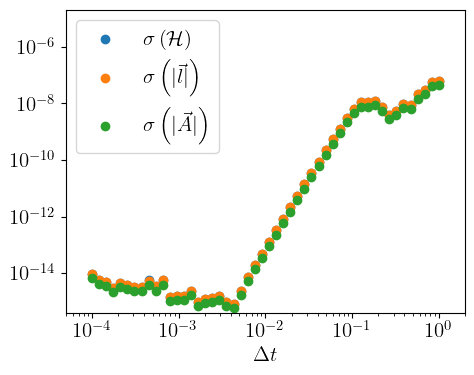

In [11]:
plt.figure(figsize=(5,4))
plt.scatter(dts, Hs, label=r"$\sigma \left(  \mathcal{H} \right)$")
plt.scatter(dts, Ls, label=r"$\sigma \left( | \vec{l} |  \right)$")
plt.scatter(dts, As, label=r"$\sigma \left( | \vec{A} |  \right)$")
plt.semilogy()
plt.semilogx()
plt.xlim(.5e-4, 2)
plt.ylim(4e-16, 2e-5)
plt.xlabel("$\Delta t$")
# plt.ylabel("Standardni odklon invariantnih količin")
plt.legend()
plt.tight_layout()
plt.savefig("images/1-stds.pdf")

/home/peter/miniforge3/envs/modelska/lib/python3.12/site-packages/scipy/integrate/_ode.py:438: UserWarning: dopri5: step size becomes too small
  self._y, self.t = mth(self.f, self.jac or (lambda: None),
/home/peter/miniforge3/envs/modelska/lib/python3.12/site-packages/scipy/integrate/_ode.py:438: UserWarning: dopri5: step size becomes too small
  self._y, self.t = mth(self.f, self.jac or (lambda: None),


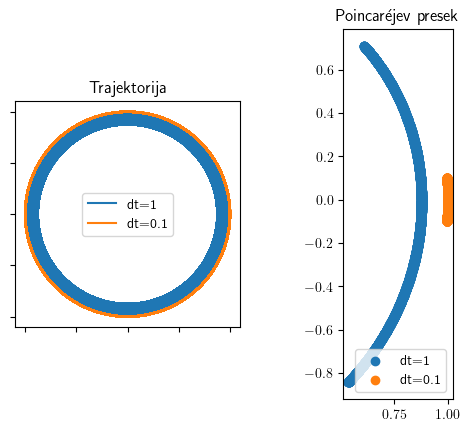

In [ ]:
def simple_poincare(sol, dt):
    x,y,u,v = sol[:,0],sol[:,1],sol[:,2],sol[:,3]
    rezs = []
    for i,current_x in enumerate(x):
        if i==0:
            continue
        if (x[i-1] > 0) and (current_x < 0):
            alpha = np.abs(x[i-1])/dt
            rezs.append(
            [alpha*y[i-1]+(1-alpha)*y[i], alpha*v[i-1]+(1-alpha)*v[i]])
    return np.array(rezs)

dt = 1
t, sol = integrate(dt=dt, t_max=30000)
poincare = simple_poincare(sol, dt)

fig, [ax1,ax2] = plt.subplots(ncols=2)
ax1.plot(sol[:,0], sol[:,1], label=f"dt={dt}")
ax1.set_aspect("equal")
ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax1.set_title("Trajektorija")
ax2.scatter(poincare[:,0], poincare[:,1], label=f"dt={dt}")
ax2.set_title("Poincaréjev presek")
ax2.set_aspect("equal")

dt = 0.1
t, sol = integrate(dt=dt, t_max=30000)
poincare = simple_poincare(sol, dt)
ax1.plot(sol[:,0], sol[:,1], label=f"dt={dt}")
ax2.scatter(poincare[:,0], poincare[:,1], label=f"dt={dt}")
ax1.legend()
ax2.legend()
plt.savefig("1-poincare1-1.png", dpi=300)

/home/peter/miniforge3/envs/modelska/lib/python3.12/site-packages/scipy/integrate/_ode.py:438: UserWarning: dopri5: step size becomes too small
  self._y, self.t = mth(self.f, self.jac or (lambda: None),


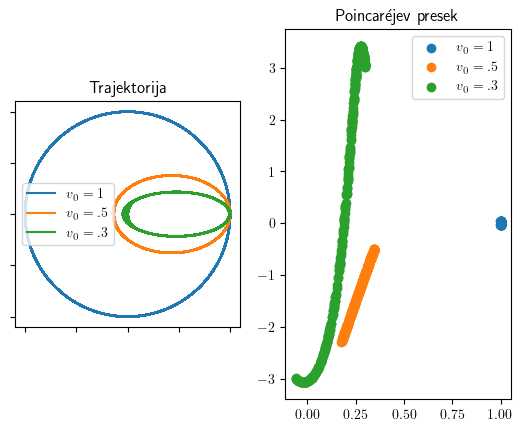

In [15]:
fig, [ax1,ax2] = plt.subplots(ncols=2)
ax1.set_aspect("equal")
ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax1.set_title("Trajektorija")
ax2.set_title("Poincaréjev presek")
#ax2.set_aspect("equal")

dt = 0.04
t, sol = integrate(dt=dt, t_max=1000, initial=[1,0,0,1])
poincare = simple_poincare(sol, dt)
ax1.plot(sol[:,0], sol[:,1], label=f"$v_0=1$")
ax2.scatter(poincare[:,0], poincare[:,1], label=f"$v_0=1$")

t, sol = integrate(dt=dt, t_max=1000, initial=[1,0,0,.5])
poincare = simple_poincare(sol, dt)
ax1.plot(sol[:,0], sol[:,1], label=f"$v_0=.5$")
ax2.scatter(poincare[:,0], poincare[:,1], label=f"$v_0=.5$")

t, sol = integrate(dt=dt, t_max=1000, initial=[1,0,0,.3])
poincare = simple_poincare(sol, dt)
ax1.plot(sol[:,0], sol[:,1], label=f"$v_0=.3$")
ax2.scatter(poincare[:,0], poincare[:,1], label=f"$v_0=.3$")

ax1.legend()
ax2.legend()
#plt.savefig("1-poincare4.pdf")

In [16]:
a = np.arange(0,10,1)
np.diff(a)

array([1, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
def simple_periods(sol, t, dt):
    x,y,u,v = sol[:,0],sol[:,1],sol[:,2],sol[:,3]
    rezs = []
    for i,current_x in enumerate(x):
        if i==0:
            continue
        if (x[i-1] > 0) and (current_x < 0):
            alpha = np.abs(x[i-1])/dt
            rezs.append(
            alpha*t[i-1]+(1-alpha)*t[i])
    return np.array(rezs)


t_mean = []
t_err = []
dts = np.logspace(-2.5,0,7)
for dt in dts:
    t, sol = integrate(dt=dt, t_max=1000, initial=[1,0,0,1])
    periods = simple_periods(sol, t, dt)
    t_mean.append(
        np.mean(np.diff(periods))
    )
    t_err.append(
        np.std(np.diff(periods))
    )


/home/peter/miniforge3/envs/modelska/lib/python3.12/site-packages/scipy/integrate/_ode.py:438: UserWarning: dopri5: step size becomes too small
  self._y, self.t = mth(self.f, self.jac or (lambda: None),


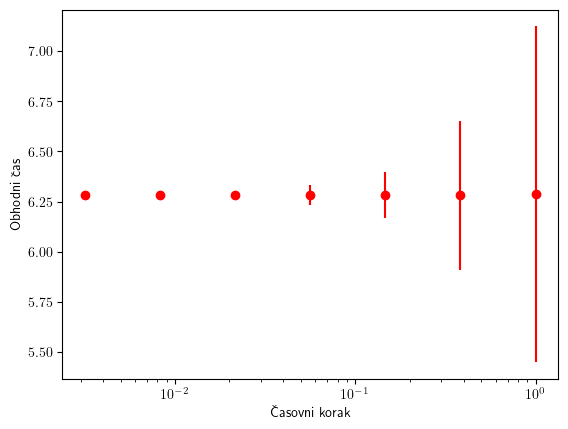

In [18]:
fig, ax = plt.subplots()
ax.errorbar(dts, t_mean, yerr=t_err, fmt="or")
ax.set_xscale("log")
ax.set_ylabel("Obhodni čas")
ax.set_xlabel("Časovni korak")
plt.savefig("1-periode.pdf")
plt.show()

/home/peter/miniforge3/envs/modelska/lib/python3.12/site-packages/scipy/integrate/_ode.py:438: UserWarning: dopri5: step size becomes too small
  self._y, self.t = mth(self.f, self.jac or (lambda: None),


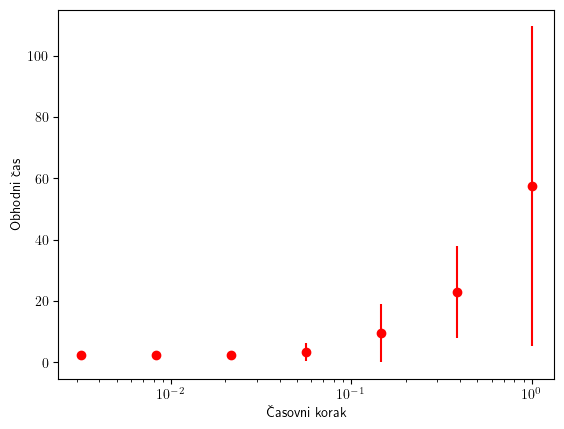

In [19]:
t_mean = []
t_err = []
dts = np.logspace(-2.5,0,7)
for dt in dts:
    t, sol = integrate(dt=dt, t_max=1000, initial=[1,0,0,0.3])
    periods = simple_periods(sol, t, dt)
    t_mean.append(
        np.mean(np.diff(periods))
    )
    t_err.append(
        np.std(np.diff(periods))
    )
fig, ax = plt.subplots()
ax.errorbar(dts, t_mean, yerr=t_err, fmt="or")
ax.set_xscale("log")
ax.set_ylabel("Obhodni čas")
ax.set_xlabel("Časovni korak")
plt.savefig("1-periode_elipticno.pdf")
plt.show()

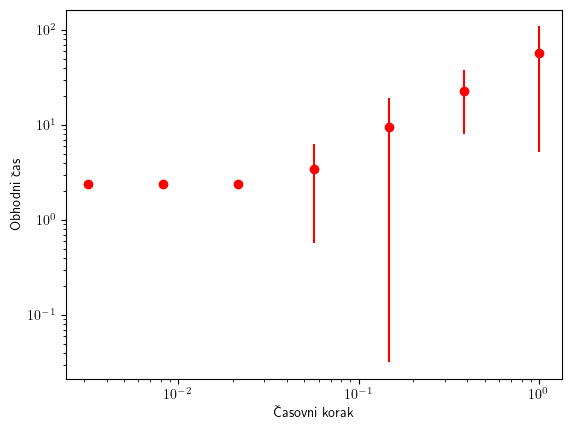

In [20]:
fig, ax = plt.subplots()
ax.errorbar(dts, t_mean, yerr=t_err, fmt="or")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel("Obhodni čas")
ax.set_xlabel("Časovni korak")
plt.savefig("1-periode_elipticno.pdf")
plt.show()

# Druga podnaloga

/home/peter/miniforge3/envs/modelska/lib/python3.12/site-packages/scipy/integrate/_ode.py:438: UserWarning: dopri5: step size becomes too small
  self._y, self.t = mth(self.f, self.jac or (lambda: None),


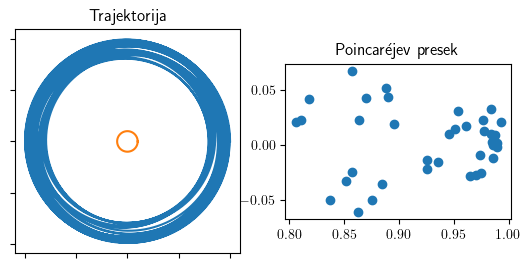

In [21]:
def integrate2(t_max:"Time until the end of integration" = 10,
             dt:"Time step" = 0.1,
             initial:"Array of initial conditions [x, y, xdot, ydot]"=[1,0,0,1],
             R:"Ratio of intrastellar radius to planetary radius"=0.5,
             faza:"Offset of the binary constelation relative to y=0 line"=0):
    def odes(t, arej, faza=faza):
        x,y,u,v = arej
        xpika = u
        ypika = v
        x1 = R*np.cos(t+faza)
        y1 = R*np.sin(t+faza)
        x2 = R*np.cos(t+np.pi+faza)
        y2 = R*np.sin(t+np.pi+faza)
        upika = - 0.5*(x-x1) * np.power((x-x1)**2 + (y-y1)**2, -3/2)\
                - 0.5*(x-x2) * np.power((x-x2)**2 + (y-y2)**2, -3/2)
        vpika = - 0.5*(y-y1) * np.power((x-x1)**2 + (y-y1)**2, -3/2)\
                - 0.5*(y-y2) * np.power((x-x2)**2 + (y-y2)**2, -3/2)
        return [xpika, ypika, upika, vpika]
    t = np.arange(0,t_max,dt)
    r = ode(odes).set_integrator('dopri5')
    r.set_initial_value(initial, t[0])
    sol = np.zeros((t.shape[0], 4)) #Result buffer
    for i, t_i in enumerate(t):
        sol[i,:] = r.integrate(t_i)
    return t, sol
def circle(R):
    fi = np.linspace(0, 2*np.pi,100)
    x = R*np.cos(fi)
    y = R*np.sin(fi)
    return x,y

R = 0.1
dt = 0.01
t, sol = integrate2(dt=dt, R=R, t_max=200)
fig, [ax1,ax2] = plt.subplots(ncols=2)
ax1.set_aspect("equal")
ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax1.set_title("Trajektorija")
ax2.set_title("Poincaréjev presek")
ax2.set_aspect("equal")
poincare = simple_poincare(sol, dt)
ax1.plot(sol[:,0], sol[:,1],)
x,y = circle(R)
ax1.plot(x,y)
ax2.scatter(poincare[:,0], poincare[:,1], )
#plt.savefig("2-small_R.pdf")
plt.show()

In [22]:
R = 0.5
dt = 0.01
t, sol = integrate2(dt=dt, R=R, t_max=200)
fig, [ax1,ax2] = plt.subplots(ncols=2)
ax1.set_aspect("equal")
ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax1.set_title("Trajektorija")
ax2.set_title("Poincaréjev presek")
ax2.set_aspect("equal")
poincare = simple_poincare(sol, dt)
ax1.plot(sol[:,0], sol[:,1],)
ax2.scatter(poincare[:,0], poincare[:,1], )
x,y = circle(R)
ax1.plot(x,y)
plt.savefig("2-big_R.pdf")
plt.show()

/home/peter/miniforge3/envs/modelska/lib/python3.12/site-packages/scipy/integrate/_ode.py:438: UserWarning: dopri5: step size becomes too small
  self._y, self.t = mth(self.f, self.jac or (lambda: None),
/home/peter/miniforge3/envs/modelska/lib/python3.12/site-packages/scipy/integrate/_ode.py:438: UserWarning: dopri5: larger nsteps is needed
  self._y, self.t = mth(self.f, self.jac or (lambda: None),
capi_return is NULL
Call-back cb_fcn_in___user__routines failed.


KeyboardInterrupt: 

//home/peter/anaconda3/lib/python3.7/site-packages/scipy/integrate/_ode.py:1177: UserWarning: dopri5: step size becomes too small
  self.messages.get(istate, unexpected_istate_msg)))


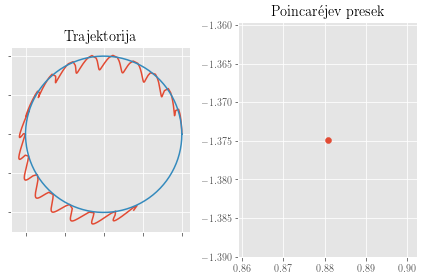

In [22]:
R = 1
dt = 0.01
t, sol = integrate2(dt=dt, R=R, t_max=5, faza=0.2)
fig, [ax1,ax2] = plt.subplots(ncols=2)
ax1.set_aspect("equal")
ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax1.set_title("Trajektorija")
ax2.set_title("Poincaréjev presek")
#ax2.set_aspect("equal")
poincare = simple_poincare(sol, dt)
ax1.plot(sol[:,0], sol[:,1],)
ax2.scatter(poincare[:,0], poincare[:,1], )
x,y = circle(R)
ax1.plot(x,y)
#plt.savefig("2-bigbig_R.pdf")
plt.show()

In [10]:
def integrate3(t_max:"Time until the end of integration" = 10,
             dt:"Time step" = 0.1,
             initial:"Array of initial conditions [x, y, xdot, ydot]"=[1,0,0,1],
             faza:"Offset of the planet"=0):
    def odes(t, arej, faza=faza):
        x,y,u,v = arej
        xpika = u
        ypika = v
        x1 = 0
        y1 = 0
        x2 = -10 + 2*t
        y2 = 1.5
        upika = -(x-x1) * np.power((x-x1)**2 + (y-y1)**2, -3/2)\
                -(x-x2) * np.power((x-x2)**2 + (y-y2)**2, -3/2)
        vpika = -(y-y1) * np.power((x-x1)**2 + (y-y1)**2, -3/2)\
                -(y-y2) * np.power((x-x2)**2 + (y-y2)**2, -3/2)
        return [xpika, ypika, upika, vpika]
    t = np.arange(0,t_max,dt)
    r = ode(odes).set_integrator('dopri5')
    r.set_initial_value(initial, t[0])
    sol = np.zeros((t.shape[0], 4)) #Result buffer
    for i, t_i in enumerate(t):
        sol[i,:] = r.integrate(t_i)
    return t, sol
def simple_poincare(sol, dt):
    x,y,u,v = sol[:,0],sol[:,1],sol[:,2],sol[:,3]
    rezs = []
    for i,current_x in enumerate(x):
        if i==0:
            continue
        if (x[i-1] > 0) and (current_x < 0):
            alpha = np.abs(x[i-1])/dt
            rezs.append(
            [alpha*y[i-1]+(1-alpha)*y[i], alpha*v[i-1]+(1-alpha)*v[i]])
    return np.array(rezs)

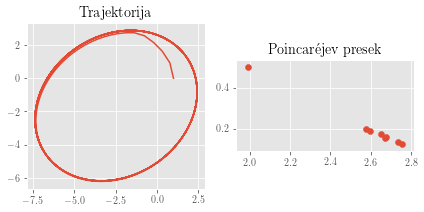

In [16]:
dt = 1
t, sol = integrate3(dt=dt, t_max=800)
fig, [ax1,ax2] = plt.subplots(ncols=2)
ax1.set_aspect("equal")
#ax1.set_yticklabels([])
#ax1.set_xticklabels([])
ax1.set_title("Trajektorija")
poincare = simple_poincare(sol, dt)
ax1.plot(sol[:,0], sol[:,1],)
ax2.scatter(poincare[:,0], poincare[:,1], )
ax2.set_title("Poincaréjev presek")
ax2.set_aspect("equal")
plt.savefig("3-trajektorija.pdf")
plt.show()

In [23]:
poincare

array([[ 0.88081021, -1.37484773]])